
<div align="left"><b> IMT Mines Alès (2019-2020)</b></div>



<p><a id="top"></a></p>



<div align="center">
<font face="Times" size="7">Analyse et calcul numériques<br/><br/>
    Exercices corrigés du TD3<br/></font><br/>
<font face="Times" size="4">P. Guyot, X. Picamoles, L. Pissot, E. Rousée</font>
</div>



<div class="alert alert-info">
<font color="black" face="Times" size="6"><b>Table des matières </b></font><br/><br/>
<font color="black" face="Times" size="5"><b><a href="#Exo1"> 1. Conjecture de Syracuse
</a></b></font><br/>
<font color="black" face="Times" size="5"><b><a href="#Exo2"> 2. Fonction de Lissage</a></b></font><br/>
<font color="black" face="Times" size="5"><b><a href="#Exo3"> 3. Suite de Fibonacci</a></b></font><br/>
</div>



<p><a id="Exo1"></a></p>



<div class="alert alert-info">
<font color="black" size="5"><b>1. Conjecture de Syracuse</b></font>
</div>



<p>Import des packages Python</p>


In [1]:

from math import *                # les constantes et fonctions mathématiques
import numpy as np                # le calcul numérique
import matplotlib.pyplot as plt   # l affichage graphique

from IPython.display import Image # pour l'incrustration des images dans le notebook




<h3 id="Exercice-1.">Exercice 1.<a class="anchor-link" href="#Exercice-1.">¶</a></h3><p>Cet exercice porte sur la conjecture dite de <i>Syracuse</i>. Partant d’un entier non nul, on suit la règle suivante :<br/>
— S’il est pair, on le divise par 2.<br/>
— S’il est impair, on le multiplie par 3 et on ajoute 1.<br/>
La conjecture de <i>Syracuse</i> énonce que la suite de nombres produite par l’application de cette règle finit toujours par se stabiliser à 1.</p>
<p>1) Écrire une fonction <code>SyracuseSuite()</code> qui prend en entrée un entier $n$ non nul et qui renvoie la liste des nombres produits par l’application de la règle précédente ainsi que le nombre d’étapes nécessaires pour atteindre la valeur 1. <br/> Vérifier ainsi la conjecture sur différentes valeurs. Par exemple, l’appel <code>SyracuseSuite(5)</code> doit produire la liste <code>[5, 16, 8.0, 4.0, 2.0, 1.0]</code></p>
<p>2) Écrire une fonction <code>GraphSyracuse()</code> qui prend en entrée un entier $n$ non nul et qui représente graphiquement les termes de la suite obtenue. Par exemple, l’appel <code>GraphSyracuse(153)</code> doit produire le graphique ci-dessous.</p>


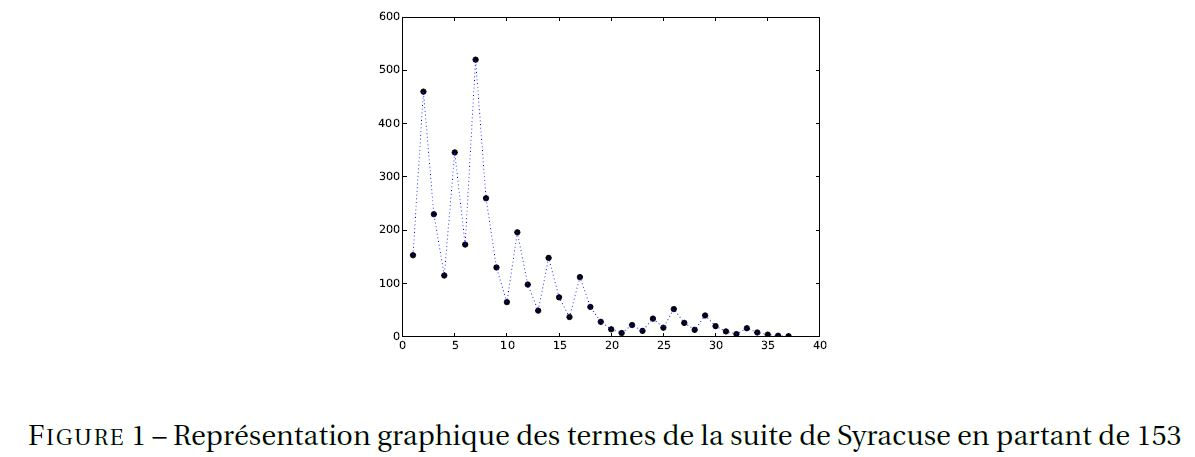

In [2]:

Image(filename="CN_TD3_ex1.jpg", embed=True, width=700)




<div class="alert alert-success"><b><font color="black" face="Times" size="3">Réponses</font></b> :<br/><br/>
<font color="black" face="Times" size="3"><b>1) Code de la fonction </b><font color="black" face="Courier" size="3">SyracuseSuite()</font></font>
</div>


In [3]:

def SyracuseSuite(n):
    """ 
    Conjecture de Syracuse (ou Collatz, ou 3x+1)
    Version qui renvoie le tableau des termes de la suite
    """     
    s = [n]              # initialisation de la suite (U0)
    while n > 1:         # Tant que la conjecture n'est pas vérifiée
        if n%2:          # comparaison logique <=> bool(1)=True et correspond au cas du test d'imparité
            n = 3*n + 1 
        else:
            n /= 2
        s.append(n)  # on complète la liste dynamique s par la valeur obtenue (Un+1)
    
    return s




<p>Résultat avec $U_0 = 5$</p>


In [4]:

s = SyracuseSuite(5)
print('suite : ',s)
print(len(s))



suite :  [5, 16, 8.0, 4.0, 2.0, 1.0]
6



<div class="alert alert-success">
<font color="black" face="Times" size="3"><b>2) Code de la fonction </b><font color="black" face="Courier" size="3">GraphSyracuse()</font></font>
</div>


In [5]:

def GraphSyracuse(n):
    """ Représentation graphique des termes de la suite de Syracuse à partir de u0 = n
        + caractéristiques visuelles
        Argument d'entrée : le rang maximum de la suite
        Argument de sortie : le graphe, la valeur maximale et le nombre de termes nécessaires
    """
    y = SyracuseSuite(n)
    x = list(range(1, len(y)+1)) # position de l'élément y correspond au rang de la suite Sn
    plt.figure(figsize=(12,6))
    plt.plot(x, y, 'ok')
    plt.plot(x, y, ':b')
    plt.title('CN3 - Exercice 1.2 : Conjecture de Syracuse ($S_0='+str(n)+'$)',fontsize=10, pad=15)
    plt.xlabel('Etape n'); plt.ylabel('S(n)');
    
    return np.max(y), len(y)




<ul>
<li>Résultats numériques et graphiques avec $U_0 = 253$</li>
</ul>


Altitude Max = 9232.0 Temps de vol = 110


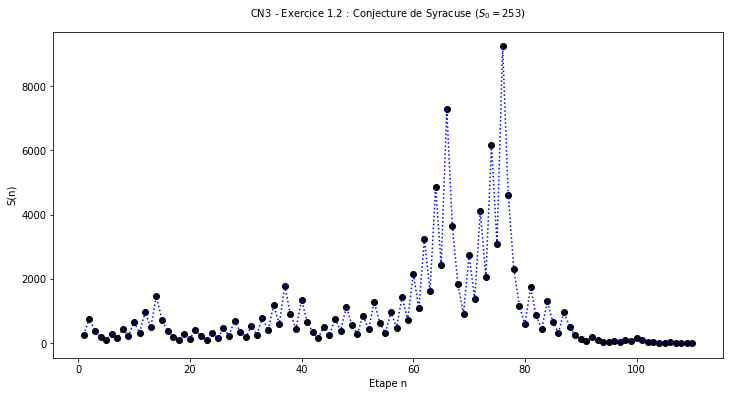

In [6]:

[altitudeMax, tpsVol] = GraphSyracuse(253)
print('Altitude Max =', altitudeMax, 'Temps de vol =', tpsVol)




<ul>
<li>Résultats numériques et graphiques avec $U_0 = 153$</li>
</ul>


Altitude Max = 520.0 Temps de vol = 37


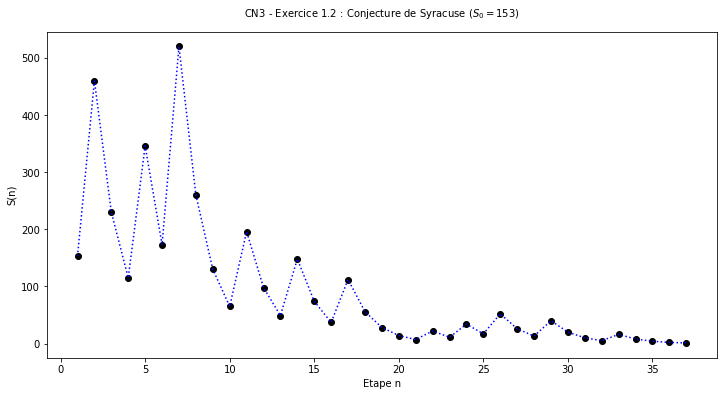

In [7]:

[altitudeMax, tpsVol] = GraphSyracuse(153)
print('Altitude Max =', altitudeMax, 'Temps de vol =', tpsVol)




<p><a id="Exo2"></a></p><div align="right"><a href="#top">Haut du document</a></div>



<div class="alert alert-info">
<font color="black" size="5"><b>2. Fonction de Lissage</b></font>
</div>



<h3 id="Exercice-2.">Exercice 2.<a class="anchor-link" href="#Exercice-2.">¶</a></h3><p>1) Construire une fonction <code>LisserTab()</code> qui prend en entrée une liste de nombres $t_i$ , un entier $p$ non nul et qui envoie une nouvelle liste dont les éléments $t'_i$ sont calculés de la manière suivante :<br/> — Si l’élément $t_i$ possède « assez de termes » avant et après lui, alors il est remplacé par <br/><br/> </p><center><font size="4"> $t_i \to t'_i = \frac{t_{i-p}+...+t_{i-1}+t_i+t_{i+1}+...+t_{i+p}} {2p+1}$ </font></center><br/>  — Si l’élément $t_i$ possède « assez de termes » après lui mais pas avant, ou le contraire, alors il est remplacé par la moyenne de tous les termes disponibles avant lui, lui-même et tous les termes disponibles après lui.<br/> Par exemple, si $p = 1$, l’appel <code>LisserTab([a,b,c], 1)</code> renvoie <br/><center><font size="4"> $[\frac{a+b} {2}, \frac{a+b+c} {3}, \frac{b+c} {2}]$ </font></center><br/><br/> Vérifier que l’appel <code>LisserTab([1,2,3,4,5], 1)</code> renvoie <code>[1.5, 2.0, 3.0, 4.0, 4.5]</code>. <br/><br/>
2) Construire maintenant une fonction <code>LisserTabIter()</code> qui prend en entrée une liste $T$ , un entier $p$ non nul, un entier $m$ non nul et qui renvoie la liste obtenue après $m$ appels de <code>LisserTab()</code>. <br/> Vérifier que l’appel <code>LisserTabIter([1, 2, 3, 4], 1, 2)</code> produit le résultat : <code>[1.75, 2.1666666666666665, 2.8333333333333335, 3.25]</code>. <br/><br/>
3) Construire maintenant une fonction <code>GraphSyracuseLisse()</code> qui prend en entrée un entier $k$ non nul, un entier $p$ non nul, un entier $m$ non nul et qui renvoie la représentation graphique « lissée » des termes de la suite de Syracuse à partir du nombre $k$ en utilisant la fonction <code>LisserTabIter()</code> avec les paramètres $p$ et $m$. Par exemple, l’appel à <code>GraphSyracuseLisse(153, 2, 5)</code> renvoie le graphique suivant : <br/>


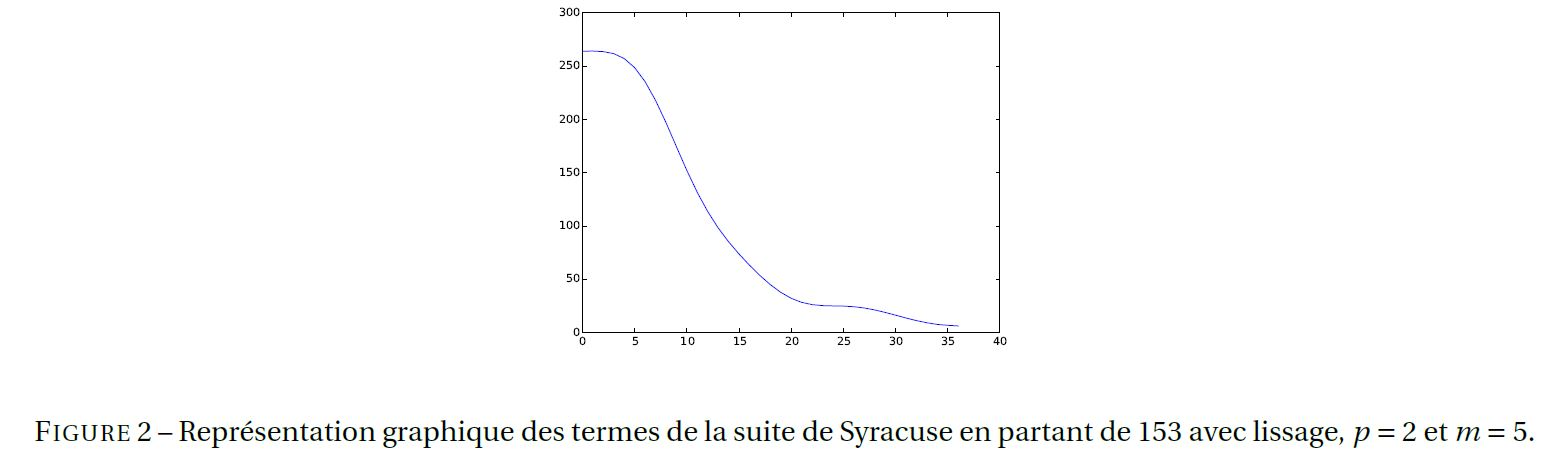

In [8]:

Image(filename="CN_TD3_ex2.jpg", embed=True, width=800, height=480)




<div class="alert alert-success"><b><font color="black" face="Times" size="3">Réponses</font></b> :<br/><br/>
<font color="black" face="Times" size="3"><b>1) Code de la fonction </b><font color="black" face="Courier" size="3">LisserTab()</font></font>
</div>


In [9]:

def LisserTab(T,p):
    """
    Moyennes mobiles sur 2*p+1 éléments
    C'est à dire p avant et p après l'élément courant
    Sauf pour les premiers et les derniers où il y en a moins

    Celà exige que 2*p+1 <= n
    """
    # Initialisation
    n = len(T);
    # Création du nouveau tableau contenant des 0 de la bonne taille
    U = [0]*n

    # Test du cas particulier où il n'y a rien à faire
    if 2*p+1 > n:
        return T
    else:
        for i in range(n):
            # Comptage du nombre de termes avant le terme t_i (indice du 1er elt de la fenetre de calcul)
            nb_avant = max(0, i-p)
            # Comptage du nombre de termes après le terme t_i
            nb_apres = min(n, i+p+1)
            # Calcul des termes du nouveau tableau par sommation (fonction du repérage précédent)
            U[i] = sum( T[k] for k in range(nb_avant, nb_apres) )
            # Division par le nombre de termes évalué (différence des positions extrêmes)
            U[i] /= (nb_apres-nb_avant)
    
    return U




<p>Résultats de l'appel <code>LisserTab([1,2,3,4,5], 1)</code></p>


In [10]:

LisserTab([1,2,3,4,5], 1)



[1.5, 2.0, 3.0, 4.0, 4.5]


<div class="alert alert-success">
<font color="black" face="Times" size="3"><b>2) Code de la fonction </b><font color="black" face="Courier" size="3">LisserTabIter()</font></font>
</div>


In [11]:

def LisserTabIter(T, p, m):
    TabLisse = T
    for i in range(0, m):
        TabLisse = LisserTab(TabLisse, p)
    
    return TabLisse




<p>Résultats de l'appel <code>LisserTabIter([1, 2, 3, 4], 1, 2)</code></p>


In [12]:

LisserTabIter([1, 2, 3, 4], 1, 2)



[1.75, 2.1666666666666665, 2.8333333333333335, 3.25]


<div class="alert alert-success">
<font color="black" face="Times" size="3"><b>3) Code de la fonction </b><font color="black" face="Courier" size="3">GraphSyracuseLisse()</font></font>
</div>



<p>On propose de superposer les différents résultats : les termes de la suite, le graphe lissé et le graphe lissé par itération.</p>


In [13]:

def GraphSyracuseLisse(n, p, m):
    y = SyracuseSuite(n)
    x = list(range(1, len(y)+1))
    t = LisserTab(y, p)
    z = LisserTabIter(y, p, m)
    plt.figure(figsize=(20,10))
    plt.plot(x, y, ':r', label="Syracuse")
    plt.plot(x, t, '-b', label="Lissage simple")
    plt.plot(x, z, '-g', label="Lissage itéré")    
    plt.title('CN3 - Exercice 1.2 : Lissage de la suite de Syracuse ($S_0='+str(n)+'$)',fontsize=10, pad=15)
    plt.xlabel('Etape n'); plt.ylabel('S(n)');
    plt.legend(loc='best')




<p>Résultats de l'appel <code>GraphSyracuseLisse(153, 2, 5)</code></p>


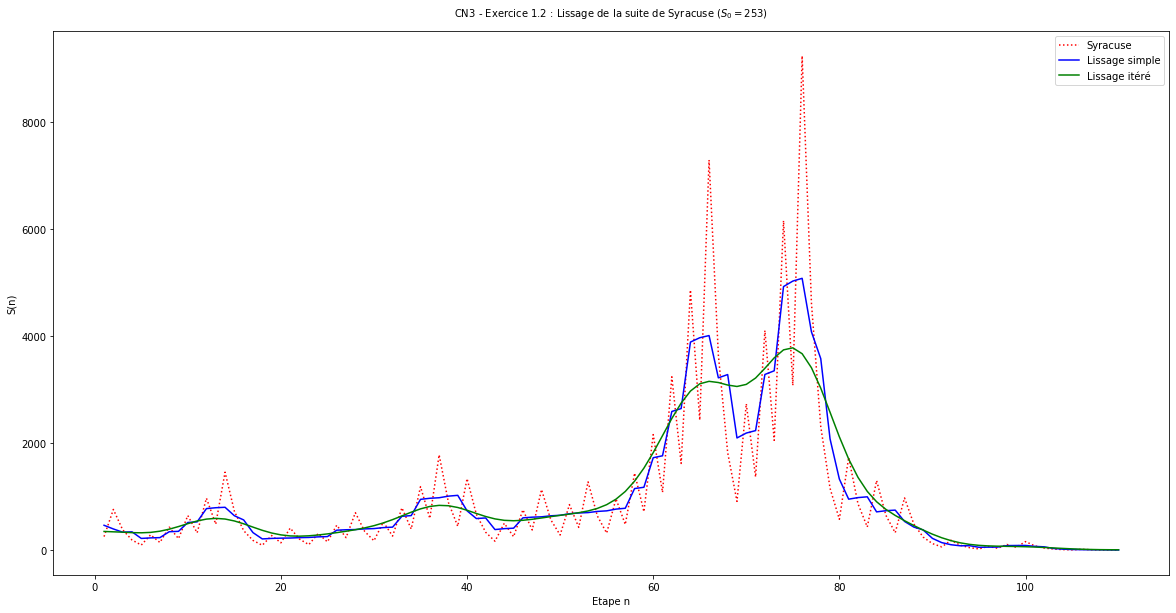

In [14]:

GraphSyracuseLisse(253, 2, 5)




<p><a id="Exo3"></a></p><div align="right"><a href="#top">Haut du document</a></div>



<div class="alert alert-info">
<font color="black" size="5"><b>3. Suite de Fibonacci</b></font>
</div>



<h3 id="Exercice-3.">Exercice 3.<a class="anchor-link" href="#Exercice-3.">¶</a></h3><p>On considère la suite de <i>Fibonacci</i>, définie par $u_0 \in $ <font face="Castellar" size="3">R</font>, et $u_1 \in$ <font face="Castellar" size="3">R</font> donnés et  $\forall n \in $ <font face="Castellar" size="3">N</font>, $u_{n+2} = u_{n+1} + u_{n}$ <br/>
1) Construire une fonction itérative <code>Fibo()</code> qui prend en entrée un entier $n$ et les valeurs $u_0$ et $u_1$ et qui renvoie la valeur $u_n$ du terme de la suite de Fibonacci.<br/> Vérifier que <code>Fibo(0,1,6)</code> donne <code>8</code>.<br/><br/> 
2) Construire une fonction récursive <code>FiboR()</code> qui prend en entrée un entier $n$ et les valeurs $u_0$ et $u_1$ et qui renvoie la valeur $u_n$ du terme de la suite de Fibonacci. <br/> Vérifier que <code>FiboR(0,1,6)</code> donne <code>8</code>.</p>



<div class="alert alert-success"><b><font color="black" face="Times" size="3">Réponses</font></b> :<br/><br/>
<font color="black" face="Times" size="3"><b>1) Code de la fonction </b><font color="black" face="Courier" size="3">Fibo()</font> (variante itérative)</font>
</div>


In [15]:

def Fibo(a, b, n):
    u = [a, b, a+b]
    for i in range(n):
        u[2] = u[1] + u[0]
        u[0] = u[1]
        u[1] = u[2]
    return u[0]




<p>Résultat de l'appel <code>Fibo(6)</code></p>


In [16]:

Fibo(0, 1, 4)



3

In [17]:
0,1,1,2,3,5,8

(0, 1, 1, 2, 3, 5, 8)


<div class="alert alert-success">
<font color="black" face="Times" size="3"><b>2) Code de la fonction </b><font color="black" face="Courier" size="3">FiboR()</font> (variante récursive)</font>
</div>


In [18]:

def FiboR(a, b, n):
    if n == 0:   # on ne dispose que de u0
        return a
    if n == 1:   # on dispose de u0 et u1
        return b
    else:
        return Fibo(a, b, n-2) + Fibo(a, b, n-1)




<p>Résultat de l'appel <code>FiboR(6)</code></p>


In [19]:

FiboR(0, 1, 6)



8


<ul>
<li>Solution optimale à partir des affectations parallèles</li>
</ul>


In [20]:

a, b, c = 0, 1, 1
while c < 11:
    print(a, end=" ")
    a, b, c = b, a+b, c+1
    #print(b) # ou print(b, end="\n") # par défaut ligne à ligne 



0 1 1 2 3 5 8 13 21 34 


<p>Une justification commentée de l'interprétation du modulo[2] comme test logique :</p>


In [ ]:

n = input("Saisir un entier = ")
res = int(n)%2
#print(res)
#print(type(res))

if res:  # res vaut 1 considere comme booleen True
    print(str(n)+' est impair')
else:
    print(str(n)+' est pair')

